In [1]:
from collections import defaultdict

import cv2
from PIL import Image, ImageDraw
import numpy as np
import random
import os
import math
from tqdm.contrib import itertools

from yacs.config import CfgNode as CN


In [2]:
"""
对get_eline的结果进行操作进行操作，取消线元畸变
"""

'\n对get_eline的结果进行操作进行操作，取消线元畸变\n'

In [3]:
from utils.detect_line import *
ori_img = cv2.imread('../static/img/1.png')
ori_img = ori_img[8000:9000, 9050:9170]

elines = get_eline_faster(ori_img, get_cfg_defaults())

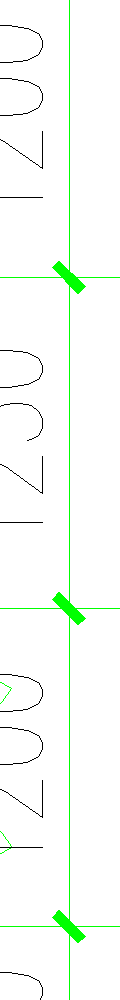

In [4]:
Image.fromarray(ori_img)

In [5]:
def eliminate_distortion(elines, img_size):

    mp = np.ones((img_size[0], img_size[1]), dtype=np.uint8) * 255
    for eline in elines:
        x1, y1 = eline.pt1
        x2, y2 = eline.pt2
        if x1 == x2 and y1 == y2:
            continue
        if x1 == x2 and abs(y1 - y2) > 1:
            cv2.line(mp, (x1, min(y1, y2) + 1), (x2, max(y1, y2) - 1), 0, 1)
        elif y1 == y2 and abs(x1 - x2) > 1:
            cv2.line(mp, (min(x1, x2) + 1, y1), (max(x1, x2) - 1, y2), 0, 1)
        else:
            continue

    target = []
    for idx, eline in enumerate(elines):
        x1, y1 = eline.pt1
        x2, y2 = eline.pt2
        if mp[y1, x1] == 0:
            target.append([x1, y1, idx])
        elif mp[y2, x2] == 0:
            target.append([x2, y2, idx])
    print(f"修正{len(target)}处")
    for x, y, idx in target:
        x1, y1 = elines[idx].pt1
        x2, y2 = elines[idx].pt2
        if x1 == x2:
            y1, y2 = sorted([y1, y2])
            if y == y1:
                elines[idx].transform_coord((x1, y1 + 1), (x2, y2))
            if y == y2:
                elines[idx].transform_coord((x1, y1), (x2, y2 - 1))
        if y1 == y2:
            x1, x2 = sorted([x1, x2])
            if x == x1:
                elines[idx].transform_coord((x1 + 1, y1), (x2, y2))
            if x == x2:
                elines[idx].transform_coord((x1, y1), (x2 - 1, y2))
    return elines

In [6]:
def _find_eliminate(elines, img_size):
    mp = np.ones((img_size[0], img_size[1]), dtype=np.uint8) * 255
    for eline in elines:
        x1, y1 = eline.pt1
        x2, y2 = eline.pt2
        if x1 == x2 and y1 == y2:
            continue
        if x1 == x2 and abs(y1 - y2) > 1:
            cv2.line(mp, (x1, min(y1, y2) + 1), (x2, max(y1, y2) - 1), 0, 1)
        elif y1 == y2 and abs(x1 - x2) > 1:
            cv2.line(mp, (min(x1, x2) + 1, y1), (max(x1, x2) - 1, y2), 0, 1)
        else:
            continue

    target = []
    for idx, eline in enumerate(elines):
        x1, y1 = eline.pt1
        x2, y2 = eline.pt2
        if mp[y1, x1] == 0:
            target.append([x1, y1, idx])
        elif mp[y2, x2] == 0:
            target.append([x2, y2, idx])
    return target

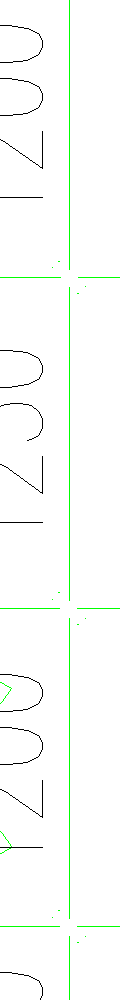

In [9]:
# 绘制线元
white = np.ones_like(ori_img, dtype=np.uint8) * 255
for eline in elines:
    cv2.line(white, eline.pt1, eline.pt2, eline.color, 1)
Image.fromarray(white)

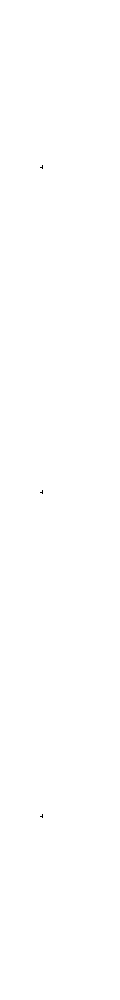

In [7]:
# 绘制畸变
targets = _find_eliminate(elines, ori_img.shape[:2])
white = np.ones_like(ori_img, dtype=np.uint8) * 255
for x, y, idx in targets:
    x1, y1 = x - 2, y - 2
    x2, y2 = x + 2, y + 2
    white[y1:y2, x1:x2] = ori_img[y1:y2, x1:x2]
Image.fromarray(white)

In [13]:
# new_elines = [[eline.pt1, eline.pt2, eline.color] for eline in elines]
new_elines = eliminate_distortion(elines, ori_img.shape[:2])


修正9975处


In [14]:
new_elines

 ...]

In [6]:
# # 绘制原图
# os.makedirs("workdir/run/", exist_ok=True)
# Image.fromarray(ori_img).save("workdir/run/origin.png")

# # 绘制新的线元
# white = np.ones_like(ori_img, dtype=np.uint8) * 255
# for eline in new_elines:
#     cv2.line(white, eline.pt1, eline.pt2, eline.color, 1)
# Image.fromarray(white).save("workdir/run/new_elines.png")
# # 绘制剩余的畸变
# targets = _find_eliminate(new_elines, ori_img.shape[:2])
# white = np.ones_like(ori_img, dtype=np.uint8) * 255
# for x, y, idx in targets:
#     x1, y1 = x - 2, y - 2
#     x2, y2 = x + 2, y + 2
#     white[y1:y2, x1:x2] = ori_img[y1:y2, x1:x2]
# Image.fromarray(white).save("workdir/run/new_targets.png")



In [15]:
# 第二次运行，发现还有三分之一畸变未消除，但绘制畸变后，发现剩余的畸变主要是粗线等，不需要再次消除
a = eliminate_distortion(new_elines, ori_img.shape[:2])

修正1844处


In [ ]:
"""
以下为草稿
"""

In [8]:
from utils.detect_line import *
ori_img = cv2.imread('../static/img/1.png')

elines = get_eline_faster(ori_img, get_cfg_defaults())

In [9]:
elines = [[eline.pt1, eline.pt2, eline.color] for eline in elines]
len(elines)

1198060

In [51]:
elines

[[(1330, 10082), (1330, 10083), (0, 255, 0)],
 [(1383, 4621), (1383, 5472), (0, 255, 0)],
 [(1383, 5487), (1383, 7372), (0, 255, 0)],
 [(1383, 7387), (1383, 7666), (0, 255, 0)],
 [(1383, 7801), (1383, 9852), (0, 255, 0)],
 [(1383, 9856), (1383, 10055), (0, 255, 0)],
 [(1383, 10070), (1383, 10197), (0, 255, 0)],
 [(1383, 10345), (1383, 11419), (0, 255, 0)],
 [(1383, 11435), (1383, 12701), (0, 255, 0)],
 [(1383, 12716), (1383, 12728), (0, 255, 0)],
 [(1383, 12862), (1383, 14574), (0, 255, 0)],
 [(1383, 14589), (1383, 14786), (0, 255, 0)],
 [(1383, 14801), (1383, 15379), (0, 255, 0)],
 [(1384, 7482), (1384, 7483), (0, 255, 0)],
 [(1384, 9975), (1384, 9976), (0, 0, 0)],
 [(1385, 7482), (1385, 7483), (0, 255, 0)],
 [(1385, 9973), (1385, 9974), (0, 0, 0)],
 [(1386, 7482), (1386, 7483), (0, 255, 0)],
 [(1386, 9971), (1386, 9972), (0, 0, 0)],
 [(1387, 7482), (1387, 7483), (0, 255, 0)],
 [(1387, 9969), (1387, 9970), (0, 0, 0)],
 [(1388, 7482), (1388, 7483), (0, 255, 0)],
 [(1389, 7482), (1389, 

In [5]:
"""
因为线元的数量过于庞大，不能使用两两组合来进行比较，即使使用区块进行优化也不行
"""

# def is_pt_on_line(pt, line):
#     """
#     这个函数用于判断一个点(x, y)是否在一条线段上[[x1, y1], [x2, y2]]
#     :param pt: (x, y)
#     :param line: [[x1, y1], [x2, y2]]
#     :return: bool
#     """
#     x, y = pt
#     x1, y1 = line[0]
#     x2, y2 = line[1]
#     if x1 == x2 == x and (y1 - y) * (y2 - y) < 0:
#         return True
#     if y1 == y2 == y and (x1 - x) * (x2 - x) < 0:
#         return True
#     return False
#
# def is_half_cross(line1, line2):
#     """
#     判断两直线是否半交叉，即是否存在“丁字路口”
#     :param line1: [[x1, y1], [x2, y2], ...]
#     :param line2: ditto ↑
#     :return: bool
#     """
#     x1, y1 = line1[0]
#     x2, y2 = line1[1]
#     x3, y3 = line2[0]
#     x4, y4 = line2[1]
#     if is_pt_on_line([x1, y1], line2) or is_pt_on_line([x2, y2], line2):
#         return True
#     if is_pt_on_line([x3, y3], line1) or is_pt_on_line([x4, y4], line1):
#         return True
#     else:
#         return False
#
# pairs = detect_anything(elines, 1000, is_half_cross)
# pairs

  0%|          | 0/308 [02:27<?, ?it/s]


KeyboardInterrupt: 

In [75]:
# 使用预处理的方式
img = ori_img
mp = np.ones((img.shape[0], img.shape[1]), dtype=np.uint8) * 255
for eline in new_elines:
    x1, y1 = eline[0]
    x2, y2 = eline[1]
    if x1 == x2 and y1 == y2:
        continue
    if x1 == x2 and abs(y1 - y2) > 1:
        cv2.line(mp, (x1, min(y1, y2) + 1), (x2, max(y1, y2) - 1), 0, 1)
    elif y1 == y2 and abs(x1 - x2) > 1:
        cv2.line(mp, (min(x1, x2) + 1, y1), (max(x1, x2) - 1, y2), 0, 1)
    else:
        continue

Image.fromarray(mp).save("workdir/run/mp.png")

In [77]:
target = []
for idx, eline in enumerate(new_elines):
    x1, y1 = eline[0]
    x2, y2 = eline[1]
    if mp[y1, x1] == 0:
        target.append([x1, y1, idx])
    elif mp[y2, x2] == 0:
        target.append([x2, y2, idx])
print(len(target))
# target

# 绘制target
os.makedirs("workdir/run/", exist_ok=True)
white = np.ones_like(img, dtype=np.uint8) * 255
for x, y, idx in target:
    x1, y1 = x - 2, y - 2
    x2, y2 = x + 2, y + 2
    white[y1:y2, x1:x2] = img[y1:y2, x1:x2]
Image.fromarray(white).save("workdir/run/targets.png")
# Image.fromarray(img).save("workdir/run/origin.png")

4808


In [52]:
for x, y, idx in target:
    x1, y1 = eline[0]
    x2, y2 = eline[1]
    if x1 == x2:
        y1, y2 = sorted([y1, y2])
        if y == y1:
            elines[idx] = [(x1, y1 + 1), (x2, y2), elines[idx][2]]
        if y == y2:
            elines[idx] = [(x1, y1), (x2, y2 - 1), elines[idx][2]]
    if y1 == y2:
        x1, x2 = sorted([x1, x2])
        if x == x1:
            elines[idx] = [(x1 + 1, y1), (x2, y2), elines[idx][2]]
        if x == x2:
            elines[idx] = [(x1, y1), (x2 - 1, y2), elines[idx][2]]

elines

[[(1330, 10082), (1330, 10083), (0, 255, 0)],
 [(1383, 4621), (1383, 5472), (0, 255, 0)],
 [(1383, 5487), (1383, 7372), (0, 255, 0)],
 [(1383, 7387), (1383, 7666), (0, 255, 0)],
 [(1383, 7801), (1383, 9852), (0, 255, 0)],
 [(1383, 9856), (1383, 10055), (0, 255, 0)],
 [(1383, 10070), (1383, 10197), (0, 255, 0)],
 [(1383, 10345), (1383, 11419), (0, 255, 0)],
 [(1383, 11435), (1383, 12701), (0, 255, 0)],
 [(1383, 12716), (1383, 12728), (0, 255, 0)],
 [(1383, 12862), (1383, 14574), (0, 255, 0)],
 [(1383, 14589), (1383, 14786), (0, 255, 0)],
 [(1383, 14801), (1383, 15379), (0, 255, 0)],
 [(1384, 7482), (1384, 7483), (0, 255, 0)],
 [(1384, 9975), (1384, 9976), (0, 0, 0)],
 [(1385, 7482), (1385, 7483), (0, 255, 0)],
 [(1385, 9973), (1385, 9974), (0, 0, 0)],
 [(1386, 7482), (1386, 7483), (0, 255, 0)],
 [(1386, 9971), (1386, 9972), (0, 0, 0)],
 [(1387, 7482), (1387, 7483), (0, 255, 0)],
 [(1387, 9969), (1387, 9970), (0, 0, 0)],
 [(1388, 7482), (1388, 7483), (0, 255, 0)],
 [(1389, 7482), (1389, 

In [53]:
white = np.ones_like(img, dtype=np.uint8) * 255
for eline in elines:
    cv2.line(white, tuple(eline[0]), tuple(eline[1]), (0, 0, 0), 1)
Image.fromarray(white).save("workdir/run/new_elines.png")

In [34]:
white = np.ones_like(img, dtype=np.uint8) * 255
for eline in elines:
    cv2.line(white, tuple(eline[0]), tuple(eline[1]), (0, 0, 0), 1)
Image.fromarray(white).save("workdir/run/elines.png")